In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vidat import Vidat

In [2]:
DATESET_PATH = r"D:\dataset\ikea_action_dataset_video"

video_list = [
    "haodong",
    "jack",
    "liyuan",
    "reaching",
    "yicong",
    "zheyu",
]

fps = 30

vidat_list = []
action_list = []
video_frame_list = []

for video in video_list:
    vidat = Vidat(os.path.join(DATESET_PATH, video, "annotations_sorted.json"))
    vidat_list.append(vidat)
    video_frame_list.append(vidat.annotation.video.frames)
    action_list.extend(vidat.annotation.actions)

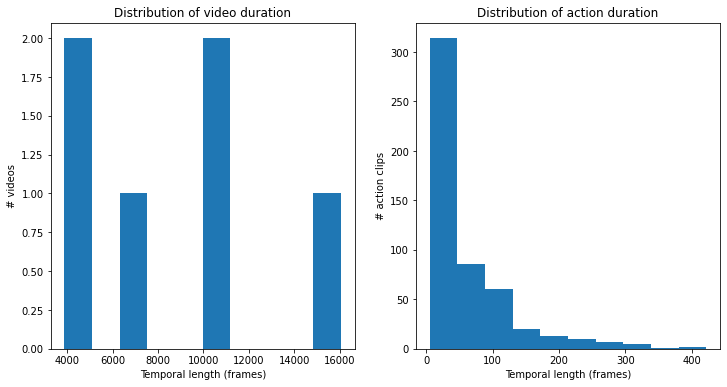

In [3]:
# Distribution of video duration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title("Distribution of video duration")
ax1.hist(video_frame_list)
ax1.set_xlabel("Temporal length (frames)")
ax1.set_ylabel("# videos")
# Distribution of video duration
action_duration_list = [int((action.end - action.start) * fps) for action in action_list]
ax2.set_title("Distribution of action duration")
ax2.hist(action_duration_list)
ax2.set_xlabel("Temporal length (frames)")
ax2.set_ylabel("# action clips")
fig.savefig("../img/Figure1.png", dpi=200)

In [4]:
# Actions distribution
data = {}
for action in action_list:
    if action.action_id in data:
        data[action.action_id] += 1
    else:
        data[action.action_id] = 1
data

{2: 25, 7: 24, 1: 121, 9: 123, 5: 60, 4: 35, 6: 81, 3: 27, 8: 22}

In [5]:
df = pd.DataFrame({"count": data})
df.sort_values("count", inplace=True)
df

,count
8,22
7,24
2,25
3,27
4,35
5,60
6,81
1,121
9,123


In [6]:
# Actions occurrences distribution
data2 = {}
for vidat in vidat_list:
    action_id_set = set()
    for action in vidat.annotation.actions:
        action_id_set.add(action.action_id)
    for action_id in action_id_set:
        if action_id in data2:
            data2[action_id] += 1
        else:
            data2[action_id] = 1
data2

{1: 6, 2: 5, 3: 6, 4: 6, 5: 6, 6: 6, 7: 5, 8: 6, 9: 6}

In [7]:
df2 = pd.DataFrame({"count": data2})
df2.sort_values("count", inplace=True)
df2

,count
2,5
7,5
1,6
3,6
4,6
5,6
6,6
8,6
9,6


<AxesSubplot:title={'center':'Actions occurrences distribution'}, xlabel='Action label', ylabel='# action clips'>

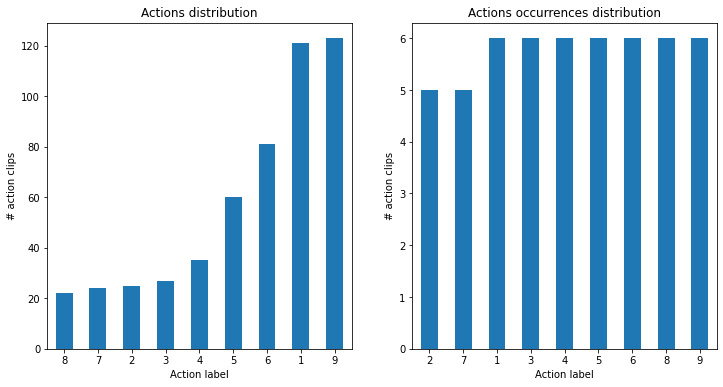

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df.plot.bar(ax=ax1, rot=0, xlabel="Action label", ylabel="# action clips", title="Actions distribution", legend=False)
df2.plot.bar(ax=ax2, rot=0, xlabel="Action label", ylabel="# action clips", title="Actions occurrences distribution", legend=False)

In [9]:
fig.savefig("../img/Figure2.png", dpi=200)